# **Exploratory Data Analysis (EDA)**

# Introduction

Exploratory Data Analysis (EDA) adalah suatu prosedur / kegiatan menganalisa data untuk memahami karakteristik data tersebut. Seringkali pada saat terjun ke lapangan, data yang kita dapat tidak datang dalam keadaan rapi dan bersih, bahkan seringkali data yang kita peroleh sangat berantakan, diperlukan usaha ekstra untuk mempersiapkan data tersebut untuk siap dilakukan analisis. Dalam pembuatan machine learning sendiri, EDA yang tidak dilakukan dengan benar memiliki resiko terhambatnya langkah selanjutnya dalam proses pembuatan machine learning tersebut.

Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
price = pd.read_csv('/content/drive/MyDrive/Materi Data analyst/Data/price.csv')

In [4]:
dir(price)

['Builtup',
 'Carpet',
 'City_Category',
 'Dist_Hospital',
 'Dist_Market',
 'Dist_Taxi',
 'House_Price',
 'Observation',
 'Parking',
 'Rainfall',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',


In [6]:
# Ukuran Data
N, P = price.shape
print(f"baris ={N}, Kolom ={P}")

baris =936, Kolom =10


In [7]:
# "Mengintip" beberapa data pertamanya
price.head(9)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000
6,7,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000
7,8,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000
8,9,7495.0,11589.0,13370.0,1090.0,1321.0,Not Provided,CAT B,680,4631000


In [8]:
# "Mengintip" beberapa data akhirnya
price.tail()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
935,936,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [9]:
# chosen at random
price.sample(11)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
641,642,3702.0,7220.0,12065.0,1677.0,2014.0,Open,CAT A,660,6080000
820,821,5424.0,6768.0,10459.0,1427.0,1723.0,Not Provided,CAT A,1040,6709000
57,58,10451.0,11465.0,16488.0,1864.0,2240.0,No Parking,CAT B,530,6700000
611,612,12580.0,14692.0,17517.0,1710.0,2053.0,Open,CAT B,730,6939000
72,73,9849.0,8773.0,15371.0,1416.0,1681.0,Not Provided,CAT A,290,7271000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
802,803,6710.0,11558.0,12516.0,1299.0,1540.0,No Parking,CAT A,590,7058000
892,893,9866.0,10124.0,14776.0,1653.0,1982.0,Covered,CAT A,390,7941000
882,883,8487.0,13020.0,15515.0,1474.0,1745.0,Not Provided,CAT A,970,6302000
224,225,9024.0,9404.0,13234.0,1863.0,2245.0,Open,CAT A,640,7726000


### Removing Variable

In [10]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties
price.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [13]:
# Drop kolom pertama karena tidak berguna (hanya index)
price.drop("Observation", axis=1, inplace=True)

In [14]:
price.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [15]:
price

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
931,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


### Mengoreksi Tipe Variabel

In [16]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [ ]:
price.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [17]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

In [18]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      923 non-null    float64 
 1   Dist_Market    923 non-null    float64 
 2   Dist_Hospital  935 non-null    float64 
 3   Carpet         928 non-null    float64 
 4   Builtup        921 non-null    float64 
 5   Parking        936 non-null    category
 6   City_Category  936 non-null    category
 7   Rainfall       936 non-null    int64   
 8   House_Price    936 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 53.5 KB


In [19]:
#mengecek apakah ada duplikat data?
print(price.shape)
price.duplicated().sum()

(936, 9)


4

In [20]:
#menghapus entri yang memiliki data duplikat
price.drop_duplicates(inplace=True)
print(price.duplicated().sum()) # no more duplicates
print(price.shape) # re-check by printing data size

0
(932, 9)


In [21]:
price

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


### Variable Selection




In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_num = price.select_dtypes(include = ['float64', 'int64'])
price_num.head()
# Perhatikan price_num adalah variable df baru! ... (hati-hati di data yang besar)

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_cat = price.select_dtypes(include = ['category'])
price_cat.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


### Dasar pengolahan variabel Kategorik : Dummy Variabel

In [22]:
price.head(2)

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000


In [23]:
df = pd.get_dummies(price['Parking'], prefix='Park')
df.head()

,Park_Covered,Park_No Parking,Park_Not Provided,Park_Open
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


### Menggabungkan dengan data awal (concat)

In [30]:
df2 = pd.concat([price, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Dist_Taxi,9796.0,8294.0,11001.0,8301.0,10510.0
Dist_Market,5250.0,8186.0,14399.0,11188.0,12629.0
Dist_Hospital,10703.0,12694.0,16991.0,12289.0,13921.0
Carpet,1659.0,1461.0,1340.0,1451.0,1770.0
Builtup,1961.0,1752.0,1609.0,1748.0,2111.0
Parking,Open,Not Provided,Not Provided,Covered,Not Provided
City_Category,CAT B,CAT B,CAT A,CAT B,CAT B
Rainfall,530,210,720,620,450
House_Price,6649000,3982000,5401000,5373000,4662000
Park_Covered,0,0,0,1,0


### Memilih data secara manual

In [ ]:
# Choosing some columns manually
X = price[['House_Price','Dist_Market']]
X[:7]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0


### Apakah ada kecenderungan perbadaan harga rumah akibat dari tipe tempat parkir ?

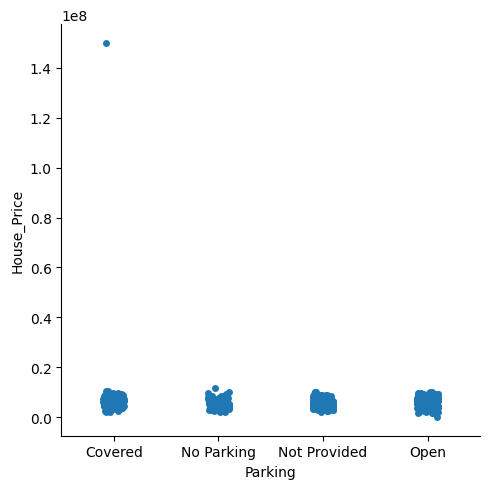

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price)
# Apa yang bisa dilihat dari hasil ini?

<ipython-input-34-30d83eb71baf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(price['House_Price'], kde=True, rug=True)


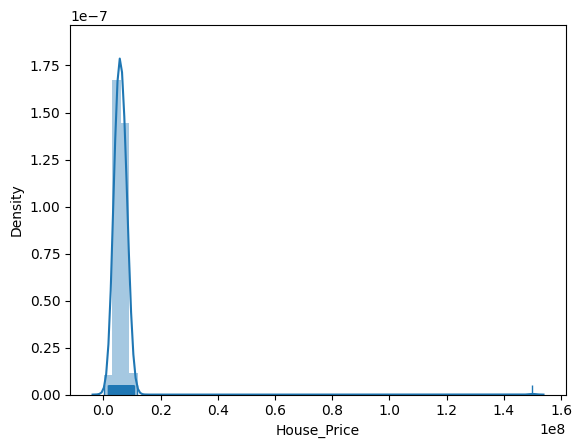

In [ ]:
# Distributions
p = sns.distplot(price['House_Price'], kde=True, rug=True)

In [31]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(932,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [33]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(931, 9) (932, 9)


<ipython-input-34-e3d0be14976a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(price2['House_Price'], kde=True, rug=True)


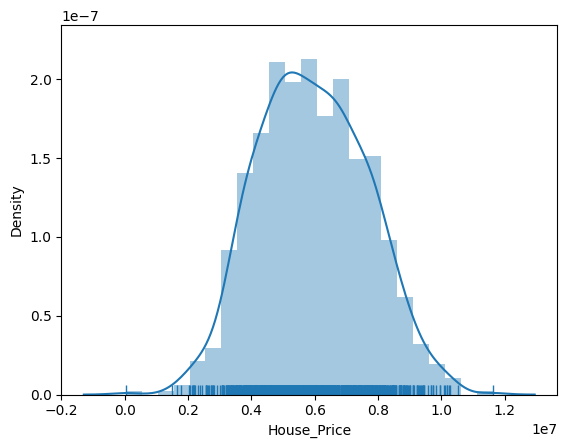

In [34]:
# Distributions
p = sns.distplot(price2['House_Price'], kde=True, rug=True)

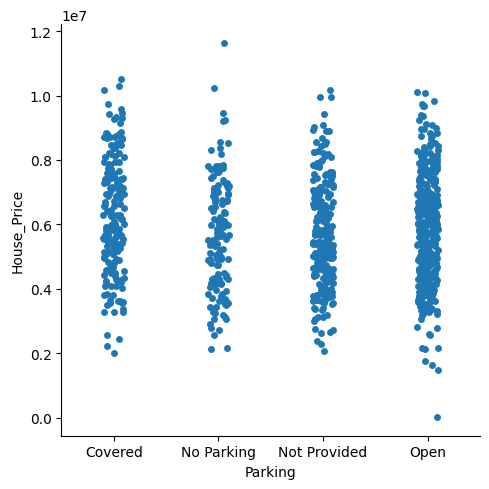

In [35]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

### Missing Value

In [36]:
# General Look at the Missing Values
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


In [37]:
set(price2['Parking'])

{'Covered', 'No Parking', 'Not Provided', 'Open'}

### Gambaran yang lebih baik tentang Missing Value terutama di Big Data

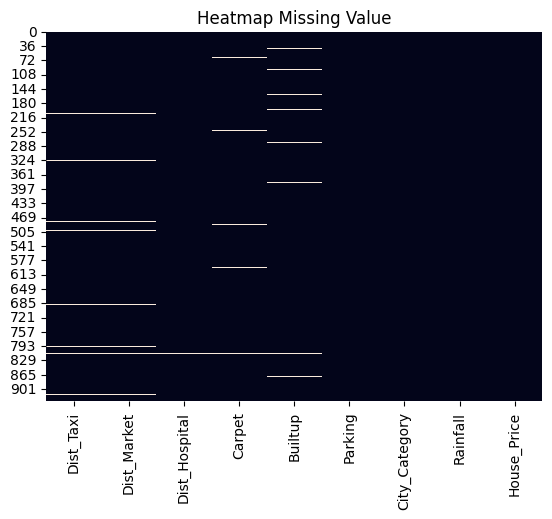

In [38]:
sns.heatmap(price2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [39]:
(price2.isnull().sum()/len(price2)).to_frame('persentase missing')

,persentase missing
Dist_Taxi,0.013963
Dist_Market,0.013963
Dist_Hospital,0.001074
Carpet,0.008593
Builtup,0.016112
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000


In [ ]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price2.dropna(subset=['Dist_Hospital']) # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price2.dropna(inplace=True)

<ipython-input-42-e35c77fa56db>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price2.dropna(inplace=True)


In [ ]:
print(price2.isnull().sum())

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64


### Statistika Deskriptif

In [ ]:
price2.describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,8.970000e+02
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,970.000000,7.183000e+06
max,16850.000000,18281.000000,22407.000000,2229.000000,2667.000000,1560.000000,1.163200e+07


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
price2.describe(include='all')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897,897,897.000000,8.970000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,353,347,NaN,NaN
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,NaN,NaN,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,NaN,NaN,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,NaN,NaN,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,NaN,NaN,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,NaN,NaN,970.000000,7.183000e+06


In [ ]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
price[['Dist_Taxi','Parking']].describe(include='all')

,Dist_Taxi,Parking
count,919.000000,932
unique,NaN,4
top,NaN,Open
freq,NaN,372
mean,8229.727965,NaN
std,2561.985008,NaN
min,146.000000,NaN
25%,6476.000000,NaN
50%,8230.000000,NaN
75%,9937.000000,NaN


### Distribui nilai pada setiap variabel kategorik

In [ ]:
# get all unique values of a variable/column
for col in price_cat.columns:
    print(col,': ', set(price[col].unique()))

Parking :  {'No Parking', 'Not Provided', 'Covered', 'Open'}
City_Category :  {'CAT A', 'CAT B', 'CAT C'}


In [ ]:
price['Parking'].unique()

['Open', 'Not Provided', 'Covered', 'No Parking']
Categories (4, object): ['Covered', 'No Parking', 'Not Provided', 'Open']

In [ ]:
# price
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = price.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['Dist_Taxi',
 'Dist_Market',
 'Dist_Hospital',
 'Carpet',
 'Builtup',
 'Rainfall',
 'House_Price']

In [ ]:
# Distribusi tiap data
price['Parking'].value_counts()
# kita bisa juga visualisasikan informasi ini

Open            372
Not Provided    227
Covered         188
No Parking      145
Name: Parking, dtype: int64

### Two-Way Tables (contingency tables)

In [ ]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
CT

Parking,Covered,No Parking,Not Provided,Open
City_Category,,,,
CAT A,72,50,80,115
CAT B,59,51,88,149
CAT C,49,40,55,89


### Data Grouping

In [ ]:
# Slicing DataFrame - Just like query in SQL
price2[price2["City_Category"] == "CAT B"].describe()
# Bisa ditambahkan .drop("Parking", axis=1) untuk menghilangkan kolom dengan single value

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02
mean,8079.703170,10693.945245,12855.314121,1500.380403,1799.806916,780.259366,5.520006e+06
std,2475.693863,2534.441833,2588.293527,252.359775,301.620757,260.422493,1.324843e+06
min,604.000000,4950.000000,4922.000000,869.000000,1050.000000,0.000000,2.130000e+06
25%,6400.500000,8891.000000,11088.500000,1317.000000,1577.500000,590.000000,4.613500e+06
50%,7998.000000,10711.000000,12950.000000,1487.000000,1787.000000,770.000000,5.438000e+06
75%,9794.000000,12535.000000,14685.000000,1688.000000,2023.500000,950.000000,6.369000e+06
max,15082.000000,17101.000000,19617.000000,2214.000000,2647.000000,1560.000000,9.661000e+06


### Saving (preprocessed) Data

In [ ]:
# Saving the preprocessed Data for future use/analysis
price2.to_csv("/content/drive/MyDrive/__/Materi Data analyst/Data/price_PreProcessed.csv", encoding='utf8')

### **Warming up discussion di Forum:**

<ul>
	<li>Outliers deteksi?, Apa yang sebaiknya dilakukan? Mengapa?</li>
	<li>Noise: Apa yang disebut dengan noise? Deteksi? Apa yang harus dilakukan?</li>
	<li>duplikasi (row/column). Apa yang harus dilakukan? Mengapa?</li>
	<li>Variabel yang berkorelasi. Apa yang sebaiknya dilakukan? Mengapa?</li>
	<li>Missing Data. Apa yang sebaiknya dilakukan? Mengapa?</li>
</ul>
